In [17]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

COMMIT_HASH_transfo = {
    "0ba4357" : "8_MIG_10Gb",
    "989cc4f": "2_MIG_40Gb",
    "baac659": "1_h100"
}

In [18]:
df = pd.read_csv("../test/test_docking.csv")
df=df[df.commit_hash.isin(COMMIT_HASH_transfo.keys())]
df.scores = df.scores.apply(lambda x: min(x,0))
# df.commit_hash [(df.method == "pyscreener")]= COMMIT_HASH
df=df.replace(COMMIT_HASH_transfo)

df.method = df.apply(
    lambda row: "pyscreener" if row.method == "pyscreener" else row.commit_hash, axis=1
)

df["time_per_molecule_s"] = df.time_per_molecule_s / df.exhaustiveness

df

,target,n_generations,method,server,time_preparation_s,time_docking_s,time_per_molecule_s,scores,exhaustiveness,commit_hash
0,3l2p_AMP_A_901,4,8_MIG_10Gb,False,0,53.514943,13.378736,-8.3000,1,8_MIG_10Gb
1,sample_347546_model_0,4,8_MIG_10Gb,False,0,49.822690,12.455672,-7.0225,1,8_MIG_10Gb
2,6r1n_SSA_A_501,4,8_MIG_10Gb,False,0,49.659788,12.414947,-6.9825,1,8_MIG_10Gb
3,2wm3_NFL_A_1300,4,8_MIG_10Gb,False,0,42.017337,10.504334,-3.8275,1,8_MIG_10Gb
4,sample_171811_model_0,4,8_MIG_10Gb,False,0,52.984692,13.246173,-7.4275,1,8_MIG_10Gb
...,...,...,...,...,...,...,...,...,...,...
1153,2wtk_ANP_C_2,4,pyscreener,False,0,20.185405,2.523176,-7.6000,2,2_MIG_40Gb
1154,sample_578466_model_0,4,pyscreener,False,0,21.405968,2.675746,-7.1750,2,2_MIG_40Gb
1155,sample_224612_model_0,4,pyscreener,False,0,24.190351,3.023794,-6.5750,2,2_MIG_40Gb
1156,sample_561808_model_0,4,pyscreener,False,0,21.362151,2.670269,-8.6000,2,2_MIG_40Gb


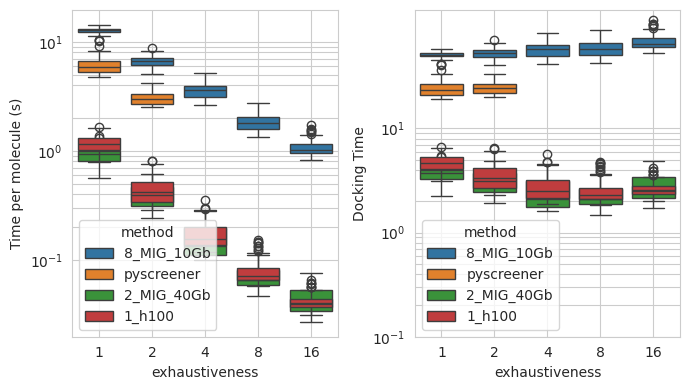

In [22]:
fig, axes = plt.subplots(1,2,figsize=(7,4))

# ax in log scale
ax = axes[0]
sns.boxplot(df.sort_values("time_docking_s", ascending=False), x="exhaustiveness", y="time_per_molecule_s", hue="method", dodge=False, ax=ax)
ax.set_yscale("log")
# More yticks
yticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,4,5,6,7,8,9,10]
ax.set_yticks(yticks)
ax.set_ylabel("Time per molecule (s)")
ax.grid(True)

ax = axes[1]
sns.boxplot(df.sort_values("time_docking_s", ascending=False), x="exhaustiveness", y="time_docking_s", hue="method", dodge=False, ax=ax)
ax.set_yscale("log")
# More yticks
yticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,4,5,6,7,8,9,10]
ax.set_yticks(yticks)
ax.set_ylabel("Docking Time")
ax.grid(True)

fig.tight_layout()